<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

In [150]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = 'project_sql'
USER = 
PASSWORD = 
HOST = 
PORT = 

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [4]:
# Что избежать отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''select
                COUNT(id) 
                from vacancies
            '''    

In [6]:
# результат запроса
count_vacancies = pd.read_sql_query(query_3_1, connection)
count_vacancies

,count
0,49197


In [8]:
# Это не ошибка и не требование, просто хочу показать пример использования f-string
print(f'Число уникальных id вакансий: {count_vacancies.squeeze()}')

Число уникальных id вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [9]:
# текст запроса
query_3_2 = f'''select
                COUNT(id) 
                from employers
            '''  

In [10]:
# результат запроса
count_employers = pd.read_sql_query(query_3_2, connection)
count_employers

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [11]:
# текст запроса
query_3_3 = f'''select
                COUNT(id) 
                from areas
            '''  

In [12]:
# результат запроса
count_areas = pd.read_sql_query(query_3_3, connection)
count_areas

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [13]:
# текст запроса
query_3_4 = f'''select
                COUNT(id) 
                from industries
            '''  

In [14]:
# результат запроса
count_industries = pd.read_sql_query(query_3_4, connection)
count_industries

,count
0,294


***

Предварительный анализ показал:
* 49197 - кол-во вакансий в базе
* 23501 - кол-во работадателей в базе
* 1362 - кол-во регионов в базе
* 294 - кол-во сфер деятельности в базе

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [15]:
# текст запроса
query_4_1 = f'''select
                a.name as area, -- Выбираем имя региона и называем этот столбец 'area'      
                COUNT(v.id) as cnt -- Считаем количество вакансий и называем этот столбец 'cnt'
                from vacancies v -- Выбираем таблицу vacancies и задаем ей алиас v
                JOIN areas a ON v.area_id=a.id -- Присоединяем таблицу 'areas' по полю area_id с полем a.id
                GROUP BY a.name -- Группируем результаты по имени региона
                ORDER BY COUNT(v.id) DESC -- Сортируем результаты по количеству вакансий в порядке убывания
                LIMIT 5 -- Ограничиваем результат до 5 строк
            '''

In [16]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [17]:
# текст запроса
query_4_2 = f'''select
                COUNT(id) 
                from vacancies
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL -- Фильтруем по условию, что поле salary_from не является NULL или поле salary_to не является NULL
            ''' 

In [18]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [19]:
# текст запроса
query_4_3 = f'''select
                AVG(salary_from) as lower,
                AVG(salary_to) as high
                from vacancies
            ''' 

In [20]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

,lower,high
0,71064.657901,110536.741923


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [21]:
# текст запроса
query_4_4 = f'''select
                schedule,
                employment,      
                COUNT(id) as count_vacancies
                from vacancies
                GROUP BY schedule, employment
                ORDER BY COUNT(id) DESC
            '''

In [22]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

,schedule,employment,count_vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [23]:
# текст запроса
query_4_5 = f'''select      
                experience,
                COUNT(id) as count_vacancies
                from vacancies
                GROUP BY experience
                ORDER BY COUNT(id)
            '''

In [24]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,experience,count_vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Детальный анализ вакансий показал:
* Москва, Санкт-Петербург, Минск, Новосибирск, Алматы - города с наибольшим кол-вом вакансий
* Средние значения для нижней и верхней границы зарплатной вилки - от 71065 до 110537 руб
* Наиболее популярное сочетание в резюме по типу графика и типу трудоустройста - Полный день и Полная занятость	
* Наибольшее число вакансий с требуемым опытом от 1 года до 3 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [25]:
# текст запроса
query_5_1 = f'''select      
                e.name,
                COUNT(v.id)
                from employers e
                JOIN vacancies v ON e.id=v.employer_id
                GROUP BY e.name
                ORDER BY COUNT(v.id) DESC
                LIMIT 5   
            '''         
            

In [26]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
# текст запроса
query_5_2 = f'''select      
                a.name,
                COUNT(e.id) AS employer_count,
                COUNT(v.id) AS vacancy_count
                FROM areas a
                LEFT JOIN vacancies v ON a.id = v.area_id
                LEFT JOIN employers e ON a.id = e.area
                GROUP BY a.name
                HAVING COUNT(v.id) = 0
                ORDER BY COUNT(e.id) DESC
                LIMIT 1
            ''' 

In [28]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

,name,employer_count,vacancy_count
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [29]:
# текст запроса
query_5_3 = f'''select      
                e.name,
                COUNT(DISTINCT v.area_id)
                from employers e
                JOIN vacancies v ON e.id = v.employer_id
                GROUP BY e.name
                ORDER BY COUNT(DISTINCT v.area_id) DESC
                LIMIT 1
            '''   

In [30]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

,name,count
0,Яндекс,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
# текст запроса
query_5_4 = f'''select
                COUNT(e.id) AS employer_count
                FROM employers e
                LEFT JOIN employers_industries ei ON e.id = ei.employer_id
                WHERE ei.industry_id is NULL
            '''     

In [32]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

,employer_count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [33]:
# текст запроса
query_5_5 = f'''select
                e.name,
                COUNT(ei.industry_id)
                FROM employers e
                JOIN employers_industries ei ON e.id = ei.employer_id
                GROUP BY e.name
                HAVING COUNT(ei.industry_id) = 4
                ORDER BY e.name
                LIMIT 1 OFFSET 2
            '''

In [34]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [35]:
# текст запроса
query_5_6 = f'''select
                COUNT(e.id) AS employer_count
                FROM employers e
                JOIN employers_industries ei ON e.id = ei.employer_id
                JOIN industries i ON ei.industry_id = i.id
                WHERE i.name = 'Разработка программного обеспечения'
            '''     

In [36]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

,employer_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [37]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
cities = str(page.find('table', class_="standard")) # Ищем таблицу с классом "standard", содержащей информацию о городах
cities = cities.split('title="')[3:] # Разделение содержимого таблицы на части по строке 'title="' и взятие среза
cities_list = [] # Создание пустого списка для хранения названий городов
for i in cities:
    cities_list.append(i.split('">')[0]) # Добавление названия города в список, разделяя строку по '">' со взятием первого элемента из списка
cities_tuple = tuple(cities_list) # Преобразование списка в кортеж
print(cities_tuple)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [38]:
# текст запроса
query_5_7 = f'''WITH vc AS (
                SELECT
                a.name,
                COUNT(v.id) AS cnt  
                FROM vacancies v
                JOIN areas a ON v.area_id = a.id 
                JOIN employers e ON v.employer_id = e.id 
                WHERE e.name = 'Яндекс' AND a.name IN {cities_tuple} 
                GROUP BY a.name
            )
                SELECT
                name,
                cnt
                FROM vc
                UNION ALL
                SELECT
                'Total' AS name,
                SUM(cnt) AS cnt
                FROM vc
                ORDER BY cnt
             '''

In [39]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

Детальный анализ работодателей показал:
* Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть	- компании с самым высоким кол-вом вакансий
* Компания Яндекс имеет наибольшее кол-во регионов с вакансиями - 181 регион
* У 8419 работадателей не указана сфера деятельности
* Со сферой деятельности - разработка програмного обеспечения отмечено 3553 работадателя
* Для компании Яндекс было найдено что общее кол-во вакансий в городах миллиониках составляет 485 вакансий

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
# текст запроса
query_6_1 = f'''select
                COUNT(id)
                FROM vacancies
                WHERE LOWER(name) LIKE '%data%'OR LOWER(name) LIKE '%данн%'
            '''  

In [41]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
# текст запроса
query_6_2 = f'''select
                COUNT (id)
                FROM vacancies
                WHERE (LOWER(name) LIKE '%data scientist%' -- фильтруем по условиям для дата-сайентс
                   OR LOWER(name) LIKE '%data science%'
                   OR LOWER(name) LIKE '%исследователь данных%'
                   OR (LOWER(name) LIKE '%ml%' and LOWER(name) not LIKE '%html%')
                   OR LOWER(name) LIKE '%machine learning%'
                   OR LOWER(name) LIKE '%машинн%обучен%')
                   and (LOWER(name) LIKE '%junior%' -- добавляем условие И для Junior
                   OR experience = 'Нет опыта'
                   OR employment = 'Стажировка')
            '''  

In [43]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
# текст запроса
query_6_3 = f'''select
                COUNT (id)
                FROM vacancies
                WHERE (LOWER(name) LIKE '%data scientist%'
                   OR LOWER(name) LIKE '%data science%'
                   OR LOWER(name) LIKE '%исследователь данных%'
                   OR (LOWER(name) LIKE '%ml%' and LOWER(name) not LIKE '%html%')
                   OR LOWER(name) LIKE '%machine learning%'
                   OR LOWER(name) LIKE '%машинн%обучен%')
                   and (key_skills LIKE '%SQL%' or key_skills LIKE '%postgres%')
            '''  


In [45]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
# текст запроса
query_6_4 = f'''select
                COUNT (id)
                FROM vacancies
                WHERE (LOWER(name) LIKE '%data scientist%'
                   OR LOWER(name) LIKE '%data science%'
                   OR LOWER(name) LIKE '%исследователь данных%'
                   OR (LOWER(name) LIKE '%ml%' and LOWER(name) not LIKE '%html%')
                   OR LOWER(name) LIKE '%machine learning%'
                   OR LOWER(name) LIKE '%машинн%обучен%')
                   and (key_skills LIKE '%Python%')
            ''' 

In [47]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
# текст запроса
query_6_5 = f'''select
                ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) -- Вычисление среднего количества ключевых навыков, разделенных символом табуляции (CHR(9))
                FROM vacancies
                WHERE (name ILIKE '%data scientist%'
                   OR name ILIKE '%data science%'
                   OR name ILIKE '%исследователь данных%'
                   OR (name LIKE '%ML%') and (name not ILIKE '%HTML%')
                   OR name ILIKE '%machine learning%'
                   OR name ILIKE '%машинн%обучен%')
                   and (key_skills is not NULL)
            '''       

In [49]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
# текст запроса
query_6_6 = f'''select
                experience,
                AVG(COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from)) / 2 AS avg_salary
                FROM vacancies
                WHERE (name ILIKE '%data scientist%'
                   OR name ILIKE '%data science%'
                   OR name ILIKE '%исследователь данных%'
                   OR (name LIKE '%ML%') and (name not ILIKE '%HTML%')
                   OR name ILIKE '%machine learning%'
                   OR name ILIKE '%машинн%обучен%')
                   AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
                GROUP BY experience;
            '''     


In [51]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

,experience,avg_salary
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


***

Предметный анализ работодателей показал:
* Кол-во вакансий имеющих отношение к данным - 1771
* Кол-во подходящих вакансий для начинающего дата-сайентиста - 51
* Кол-во вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres - 229
* Кол-во вакансий для DS, в которых в качестве ключевого навыка указан Python - 357
* Среднее кол-во навыков в вакансиях для DS - 6.41
* Средняя ЗП для DS от 74643 (без опыта) до 243115 (с опытом от 3 до 6 лет)


## Дополнительные исследования данных

7. Найдём 10-ку компаний c наибольшим кол-вом вакансий в DS

In [52]:
query_7 = f'''select
                e.name as работадатель,
                COUNT(v.id) as "кол-во вакансий"
                from employers e
                JOIN vacancies v ON e.id=v.employer_id
                WHERE (LOWER(v.name) LIKE '%data scientist%'
                   OR LOWER(v.name) LIKE '%data science%'
                   OR LOWER(v.name) LIKE '%исследователь данных%'
                   OR (LOWER(v.name) LIKE 'ml%' and LOWER(v.name) not LIKE '%html%')
                   OR LOWER(v.name) LIKE '%machine learning%'
                   OR LOWER(v.name) LIKE '%машинн%обучен%')
                GROUP BY e.name
                ORDER BY COUNT(v.id) DESC
                LIMIT 10
            ''' 

In [53]:
df_7 = pd.read_sql_query(query_7, connection)
df_7

,работадатель,кол-во вакансий
0,СБЕР,35
1,Банк ВТБ (ПАО),18
2,VK,14
3,Bell Integrator,14
4,Positive Technologies,9
5,Яндекс,9
6,МегаФон,8
7,Andersen,7
8,Контур,6
9,Бэнкс Софт Системс,6


По данному анализу мы видим список компаний, куда возможно будет больше шансов устроиться на позицию DS

8. Найдём 10-ку компаний самыми высокими средними зарплатами (там где они указаны) для DS и названиями вакансий

In [54]:
query_8 = f'''select
                e.name as работадатель,
                v.name as вакансия,
                COUNT(v.id) as "кол-во вакансий",
                AVG(COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from)) / 2 AS avg_salary
                from employers e
                JOIN vacancies v ON e.id=v.employer_id
                WHERE (LOWER(v.name) LIKE '%data scientist%'
                   OR LOWER(v.name) LIKE '%data science%'
                   OR LOWER(v.name) LIKE '%исследователь данных%'
                   OR (LOWER(v.name) LIKE 'ml%' and LOWER(v.name) not LIKE '%html%')
                   OR LOWER(v.name) LIKE '%machine learning%'
                   OR LOWER(v.name) LIKE '%машинн%обучен%')
                   AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
                GROUP BY e.name, v.name
                ORDER BY avg_salary DESC
                LIMIT 10
            '''  

In [55]:
df_8 = pd.read_sql_query(query_8, connection)
df_8

,работадатель,вакансия,кол-во вакансий,avg_salary
0,Итон,ML Engineer \ Data scientist,1,450000.0
1,AppQuantum,ML & Advanced analytics Lead / Lead Data Scien...,1,350000.0
2,OVISION,Data Scientist,1,300000.0
3,Semrush,Senior Data Analyst / Senior Data Scientist (A...,1,300000.0
4,СберЛизинг,Руководитель направления Data Science,1,300000.0
5,JSA Group,Senior Data Scientist,2,300000.0
6,Дром,Lead data scientist,1,300000.0
7,Andersen,Machine Learning Engineer,2,292242.0
8,Dbrain,ML engineer,1,275000.0
9,КИБЕР-РОМ,Data scientist,1,275000.0


По данному анализу можно сделать вывод что более мелкие компании (по кол-ву вакансий) могут предлагать зарплату для DS намного выше по рынку

# Общий вывод по проекту

# Распределение вакансий:

* Вакансии состредоточены в крупных городах, таких как Москва и Санкт-Петербург.
* Полный день и полная занятость являются наиболее популярными режимами работы.
* Требуемый опыт чаще всего составляет от 1 до 3 лет.

# Анализ работодателей:

* Крупные компании Яндекс и Ростелеком, лидируют по количеству вакансий.
* Значительное число работодателей не указывает сферу деятельности.
* В городах-миллионниках наблюдается высокая активность вакансий от компании Яндекс.

# Анализ вакансий для DS:

* Вакансии, связанные с данными, составляют немалую часть.
* Начинающим дата-сайентистам доступно сравнительно небольшое количество вакансий.
* Python является наиболее востребованным навыком для DS, за ним следуют SQL и Postgres.
* Средняя зарплата для DS значительно варьируется в зависимости от опыта.
* Более мелкие компании (по кол-ву вакансий) могут предлагать зарплату для DS намного выше по рынку

***

## В качестве доп.исследований, давайте выполним пару визуализации:

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

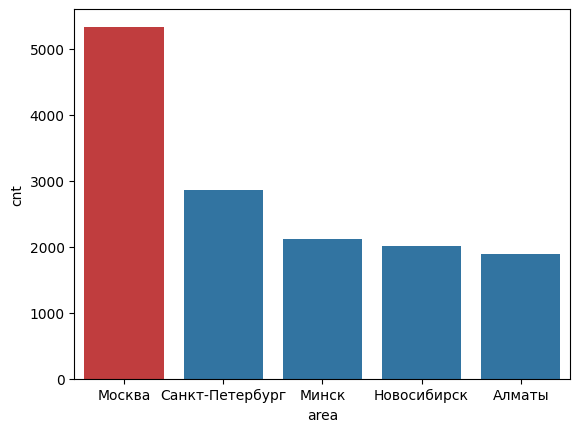

In [57]:
query_4_1 = f'''SELECT a.name area, COUNT(v.area_id) cnt
FROM vacancies v JOIN areas a ON v.area_id = a.id
GROUP BY a.id, a.name
ORDER BY 2 DESC
LIMIT 5
'''
df = pd.read_sql_query(query_4_1, connection)

filtred_color = [('tab:red' if x > 3000 else 'tab:blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

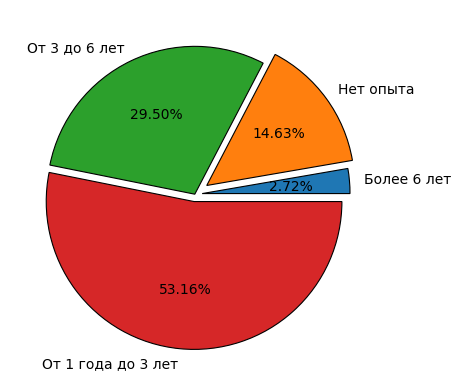

In [58]:
query_4_5 = f'''SELECT experience, COUNT(id)
FROM vacancies
GROUP BY 1
ORDER BY 2
'''
df = pd.read_sql_query(query_4_5, connection)

plt.pie(
    df['count'],
    labels = df['experience'].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

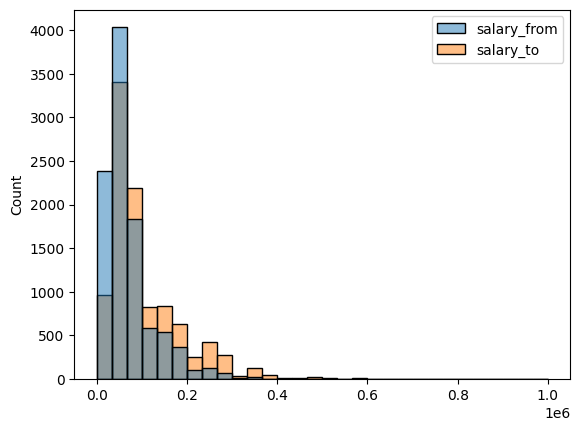

In [59]:
query_4_3 = f'''
SELECT 
    salary_from as salary_from, 
    salary_to as salary_to
FROM 
    vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df.dropna(inplace=True)
sns.histplot(data=df, bins=30);